In [20]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import pandas as pd
import random

ROOT_DIR = "/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn"



## Correct JSON files

In [42]:
data_path = '/Users/tom/Desktop/Stanford/RA/OligodendroSight/datasets/Lauren/'
img_path = os.path.join(data_path, 'Sample_TomGUI_norm')
mask_path = os.path.join(data_path, 'masks')
json_path = os.path.join(data_path, 'jsons')

for filename in sorted(os.listdir(img_path)):
    if filename.endswith('.tif'):
        print(filename)
        img = cv2.imread(os.path.join(img_path, filename))
        mask_color = cv2.imread(os.path.join(mask_path, filename),1)
        mask_gray = 255- cv2.imread(os.path.join(mask_path, filename),0)
        contours, _ = cv2.findContours(mask_gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        sorted_contours = sorted(contours, key=lambda x: len(x), reverse=True)
        #print(len(sorted_contours))
        for contour in sorted_contours:
            if cv2.contourArea(contour) < 1000:
                print(cv2.contourArea(contour))
                print(contour[0][0])
                sorted_contours.remove(contour)
            cv2.drawContours(mask_color, [contour], -1, (0,0,255),2)
        '''plt.figure(figsize=(15,15))
        plt.imshow(img)
        plt.title(filename)
        plt.show()
        plt.figure(figsize=(15,15))
        plt.imshow(mask_color) '''
        shapes_dict = {'shapes': [{"points":[coord[0].tolist() for coord in contour],
                           "label":"cell",
                           "cell number":f"{i+1}"} for i, contour in enumerate(sorted_contours)],
               'imagePath':os.path.join(img_path, filename),
               'imageHeight':mask_gray.shape[0],
               'imageWidth':mask_gray.shape[1]}
        json_file = os.path.join(json_path, filename[:-4]+'.json')
        with open(json_file, 'w') as f:
            json.dump(shapes_dict, f)

1.tif
10.tif
11.tif
12.tif
13.tif
15.tif
16.tif
17.tif
18.tif
2.tif
22.tif
24.tif
26.tif
27.tif
28.tif
3.tif
30.tif
4.tif
5.tif
6.tif
8.tif
9.tif


In [7]:
#to use when filtering small holes from masks
"""data_path = '/Users/tom/Desktop/Stanford/RA/OligodendroSight/datasets/Lauren/'
img_path = os.path.join(data_path, 'Sample_TomGUI_norm')
mask_path = os.path.join(data_path, 'masks')
json_path = os.path.join(data_path, 'jsons')

unused = []
corrected_set = []

to_be_corrected = ['1.tif'
                   ]

for filename in sorted(os.listdir(img_path)):
    if filename.endswith('.tif') and filename in to_be_corrected:
        print(filename)
        img = cv2.imread(os.path.join(img_path, filename))
        mask_color = cv2.imread(os.path.join(mask_path, filename[:-4]+'.tif'),1)
        mask_gray = 255- cv2.imread(os.path.join(mask_path, filename[:-4]+'.tif'),0)
        annot = json.load(open(os.path.join(json_path, filename[:-4]+'_mask.json')))
        contours, _ = cv2.findContours(mask_gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        sorted_contours = sorted(contours, key=lambda x: len(x), reverse=True)
        for contour in sorted_contours:
            if cv2.contourArea(contour) < 1000:
                sorted_contours.remove(contour)
            cv2.drawContours(mask_color, [contour], -1, (0,0,255),2)
        i_max = 0
        cv2.drawContours(mask_color, sorted_contours, i_max, (0,255,0),2)
        plt.figure(figsize=(15,15))
        plt.imshow(img)
        plt.title(filename)
        plt.show()
        plt.figure(figsize=(15,15))
        plt.imshow(mask_color)
        '''        for i in range(len(annot['shapes'])):
            x = [annot['shapes'][i]['points'][j][0] for j in range(len(annot['shapes'][i]['points']))]
            y = [annot['shapes'][i]['points'][j][1] for j in range(len(annot['shapes'][i]['points']))]
            plt.scatter(x,y,label=annot['shapes'][i]['cell number'],s=1)
        plt.legend()
        plt.show()
        plt.figure(figsize=(15,15))
        plt.imshow(mask_color)
        plt.show()'''
        
        shapes_dict = {'shapes': [{"points":[coord[0].tolist() for coord in sorted_contours[i_max]],
                           "label":"cell",
                           "cell number":"1"}],
               'imagePath':os.path.join(img_path, filename),
               'imageHeight':mask_gray.shape[0],
               'imageWidth':mask_gray.shape[1]}
        json_file = '/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data/masks/new_contour.json'
        with open(json_file, 'w') as f:
            json.dump(shapes_dict, f)
        
        break"""

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tom/Downloads/add_data/imgs'

## Test all masks and bbox for cropped dataset

filename: 281.it10.20x.r1.3.tif
bbox: 786 504 1624 1266


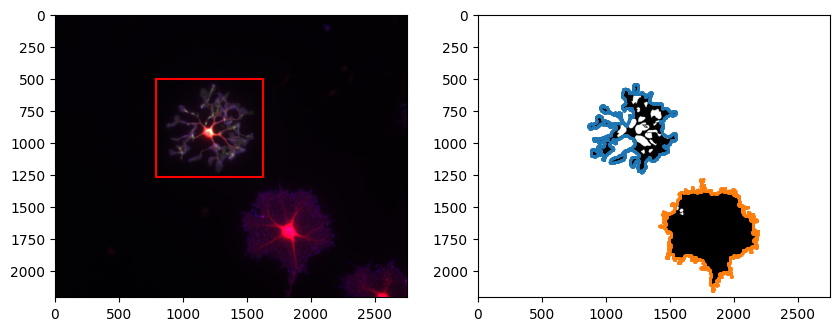

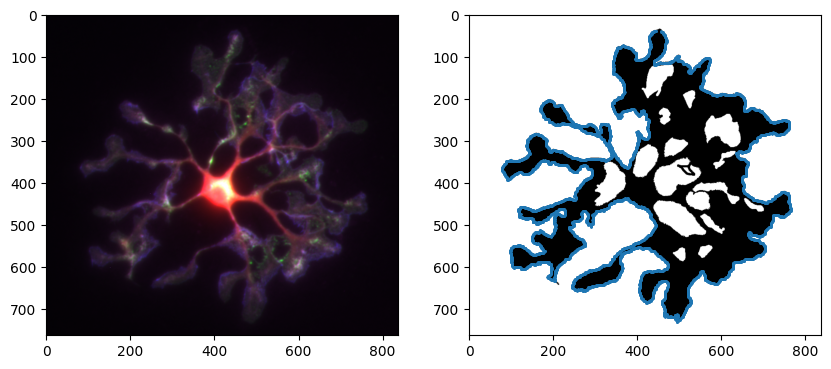

filename: 281.it10.20x.r1.3.tif
bbox: 1374 1242 2274 2176


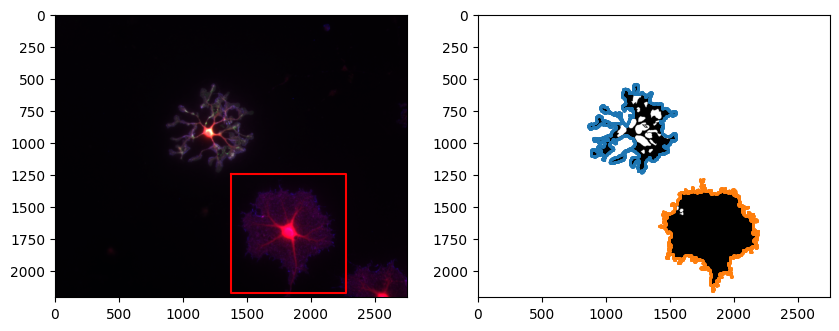

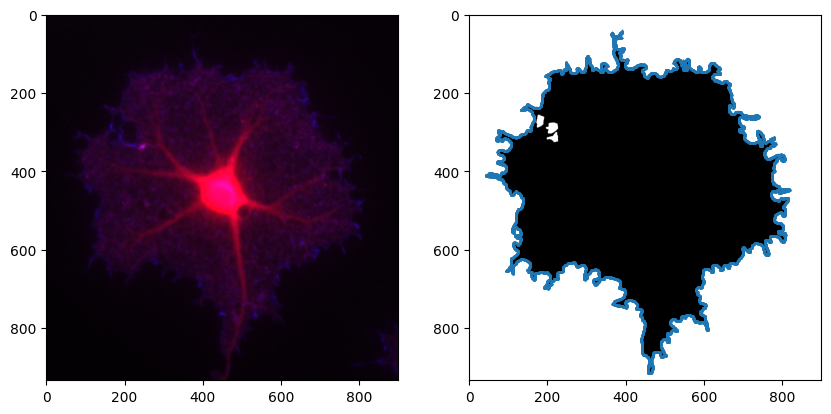

filename: 281.it10.20x.r1.9.tif
bbox: 1005 759 1677 1489


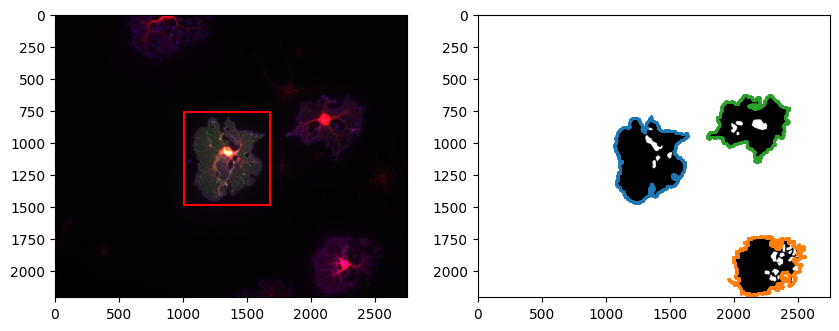

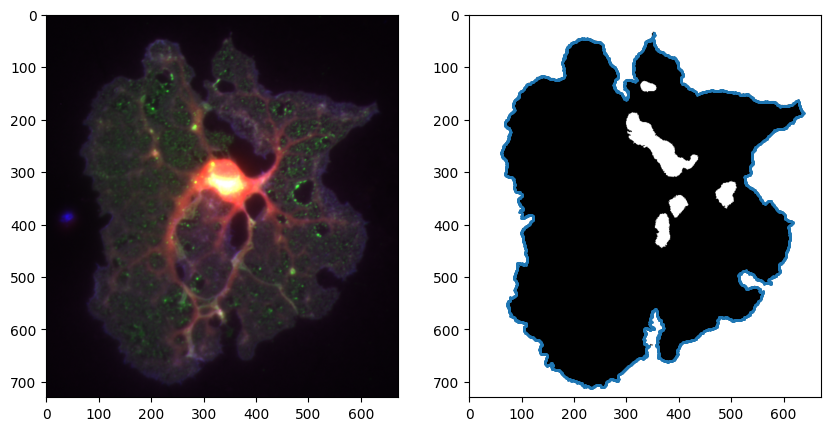

filename: 281.it10.20x.r1.9.tif
bbox: 1758 558 2484 1188


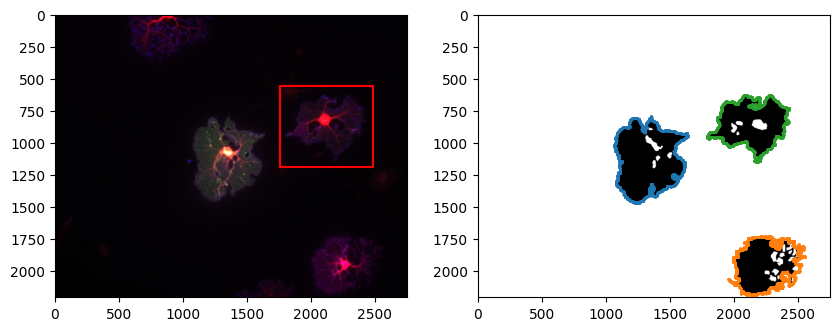

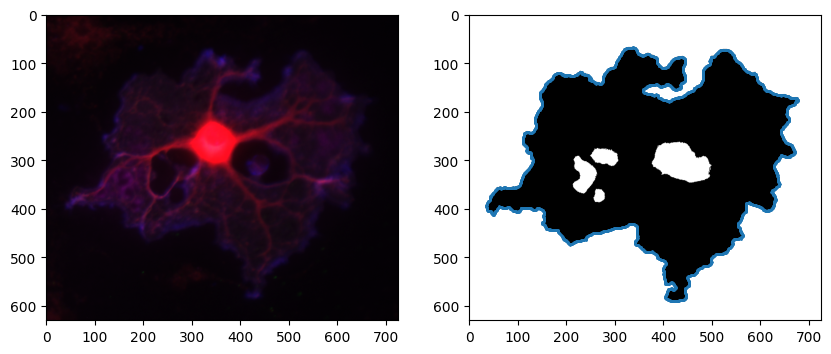

filename: 281.it10.20x.r1.9.tif
bbox: 1929 1698 2613 2208


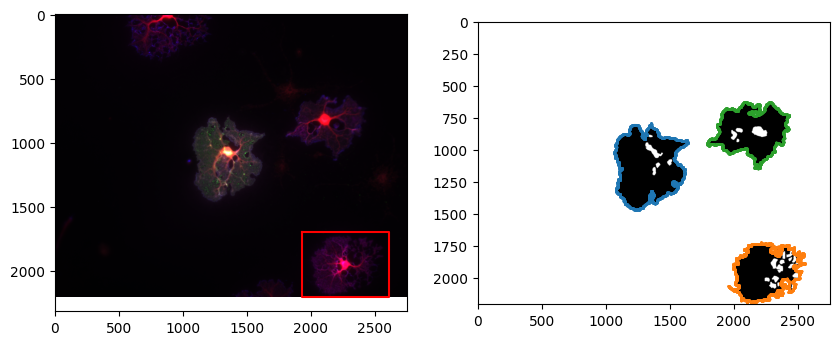

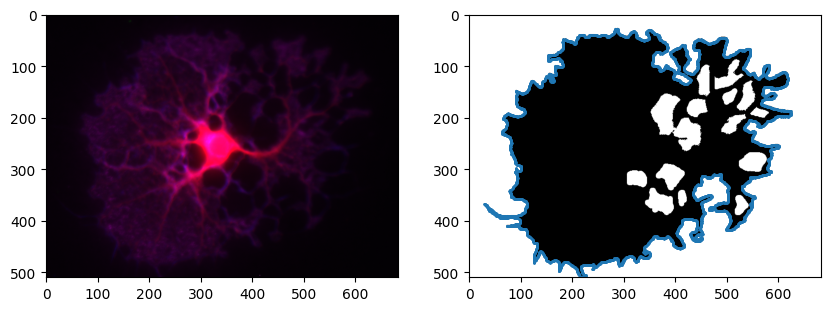

filename: 281.it10.20x.r2.1.tif
bbox: 1020 288 1792 868


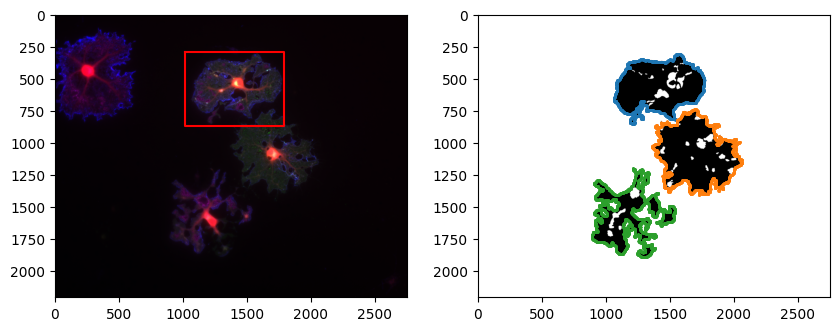

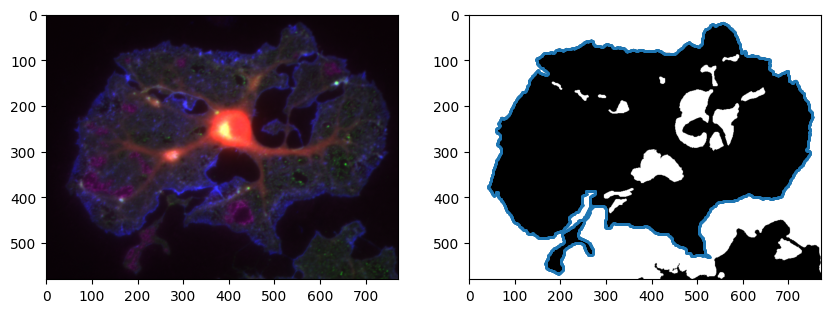

filename: 281.it10.20x.r2.1.tif
bbox: 1329 729 2089 1435


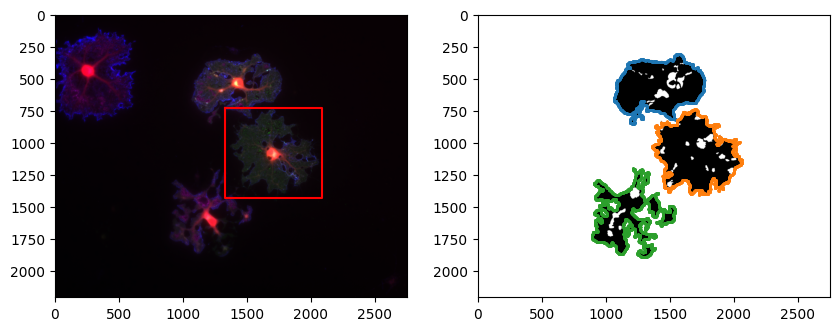

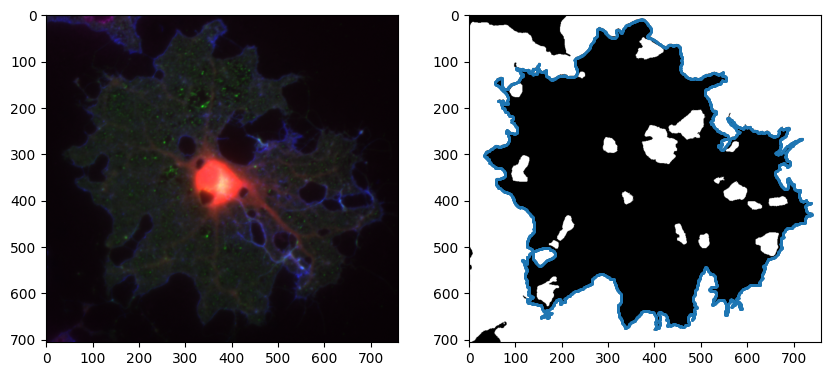

filename: 281.it10.20x.r2.1.tif
bbox: 792 1164 1578 1908


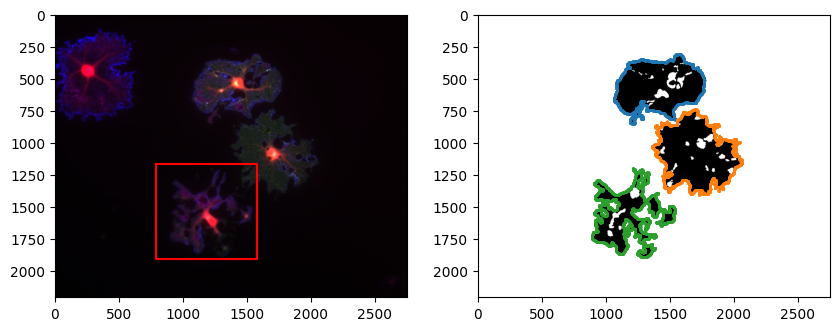

filename: 281.it10.20x.r3.2.tif
bbox: 363 513 999 1159


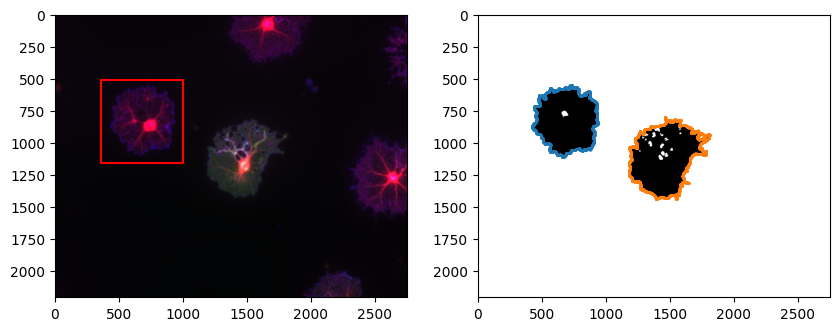

filename: 281.it10.20x.r3.2.tif
bbox: 1125 747 1851 1495


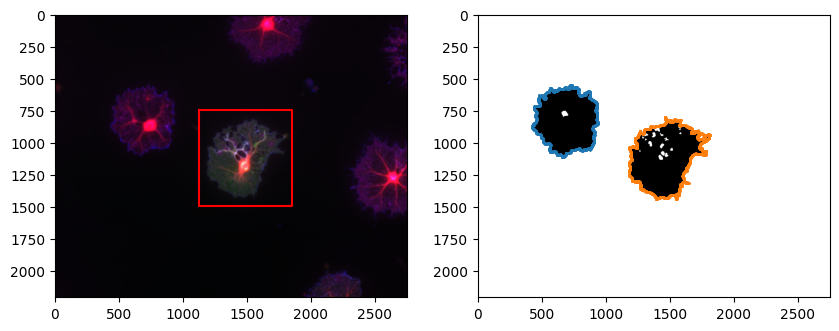

filename: 281.it11.20x.r1.10.tif
bbox: 960 696 1770 1480


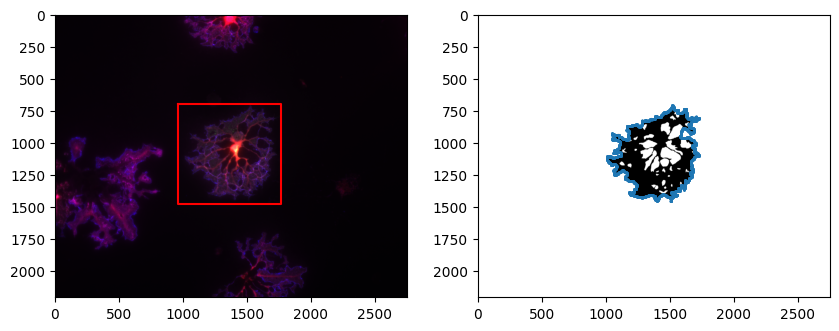

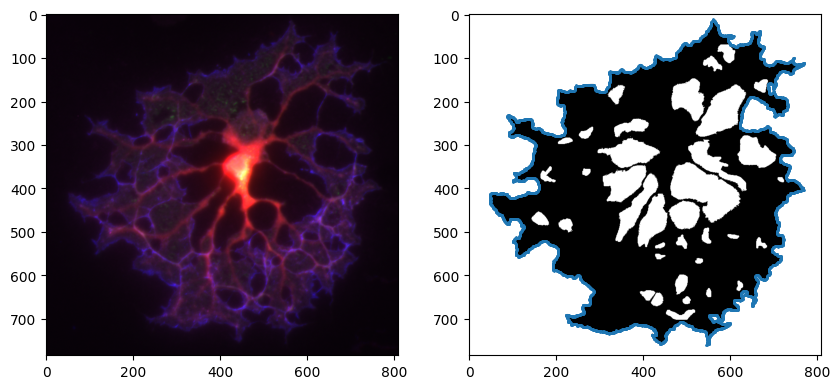

filename: 281.it12.20x.r1.9.tif
bbox: 1338 222 1878 798


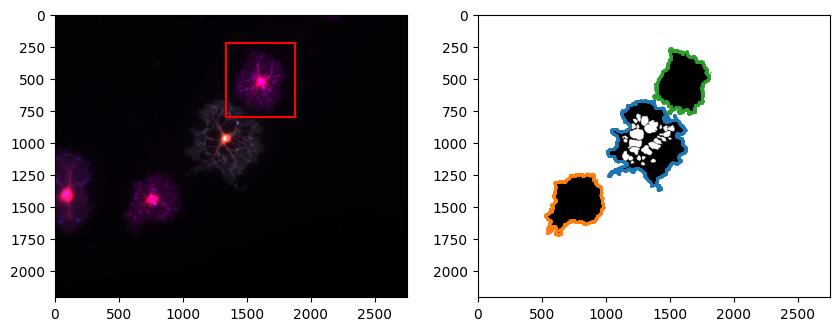

filename: 281.it12.20x.r1.9.tif
bbox: 927 651 1653 1381


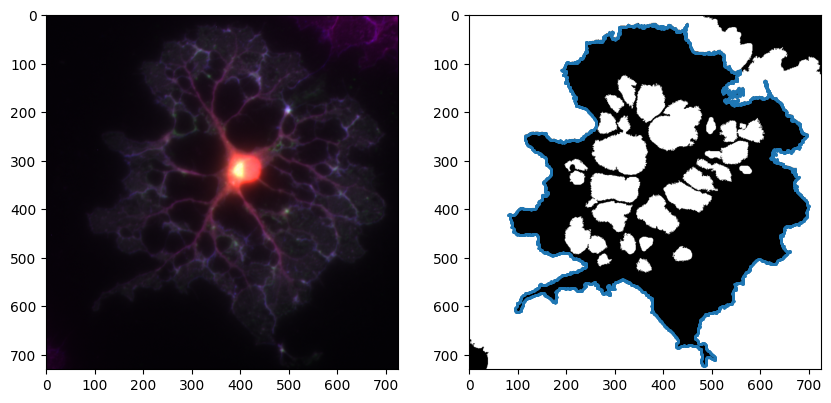

filename: 281.it12.20x.r1.9.tif
bbox: 500 1224 1020 1740


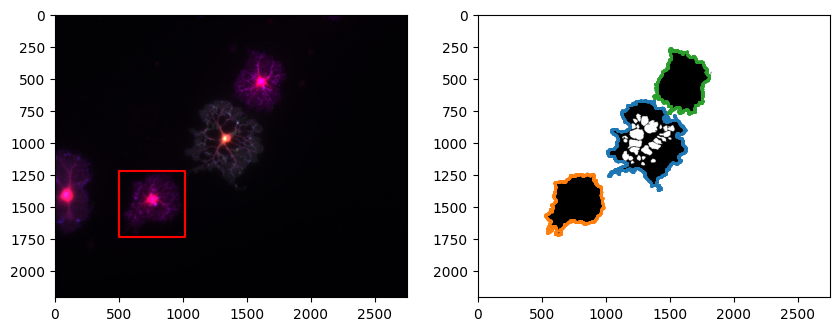

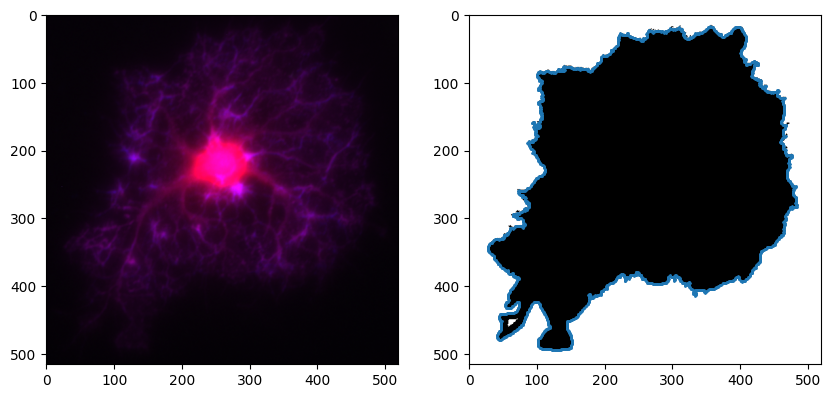

filename: image_10.tif
bbox: 189 687 609 1039


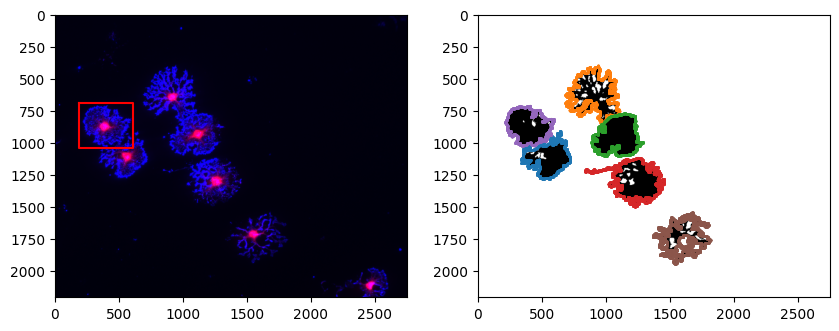

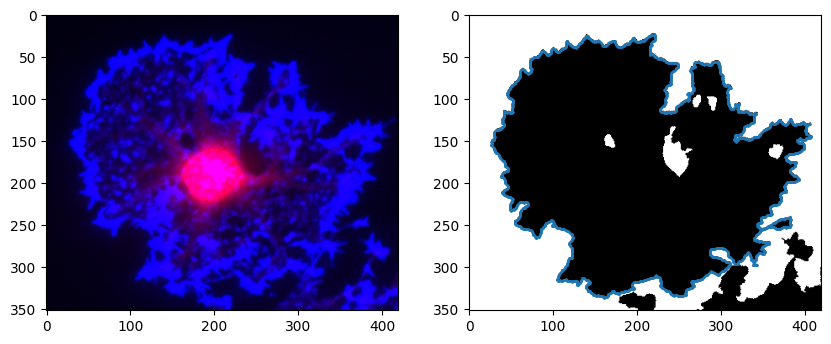

filename: image_10.tif
bbox: 303 894 763 1320


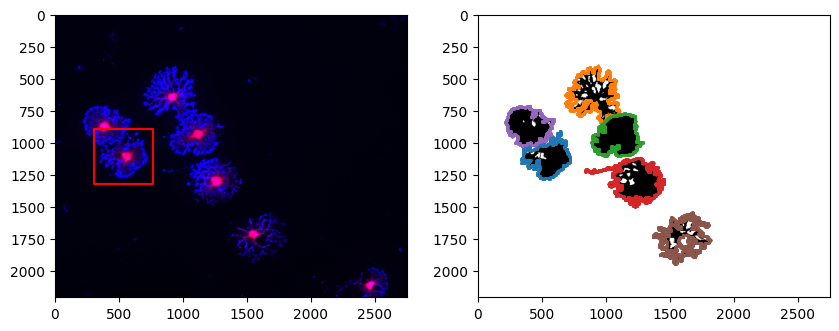

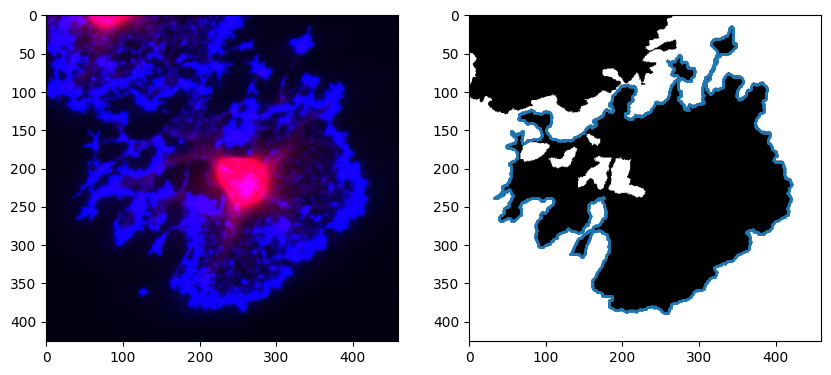

filename: image_10.tif
bbox: 654 369 1170 853


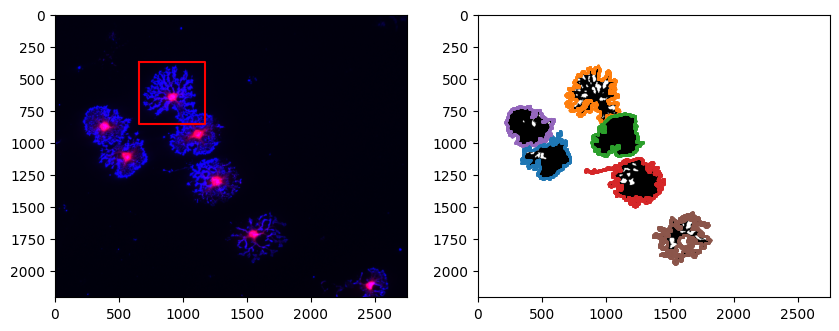

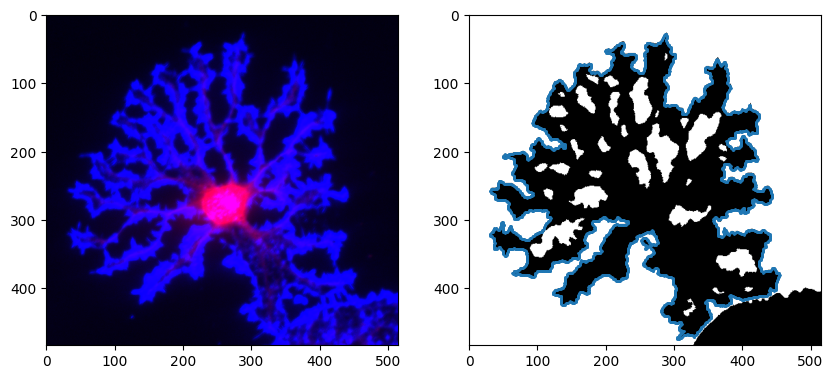

filename: image_10.tif
bbox: 858 752 1320 1138


filename: image_10.tif
bbox: 812 1110 1510 1510


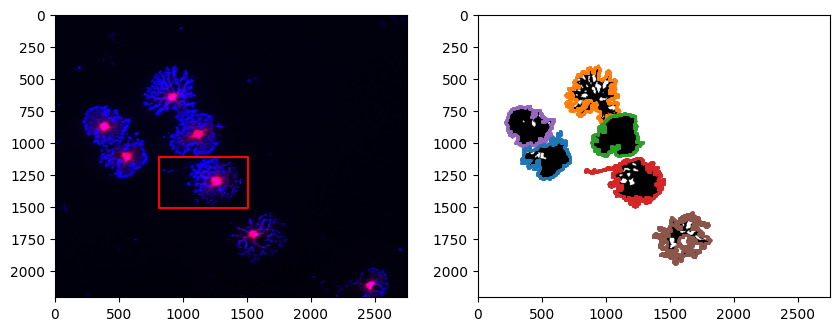

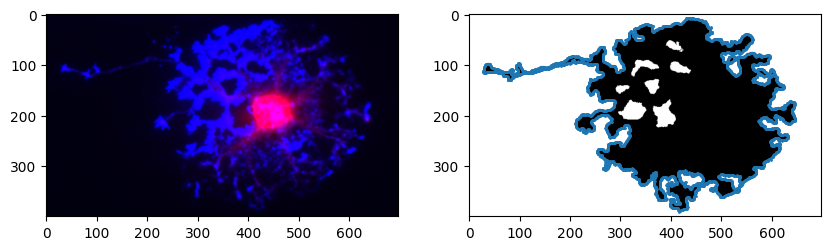

filename: image_10.tif
bbox: 1328 1518 1854 1956


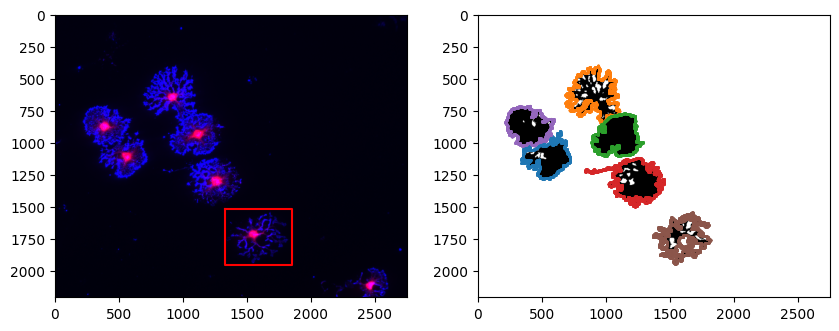

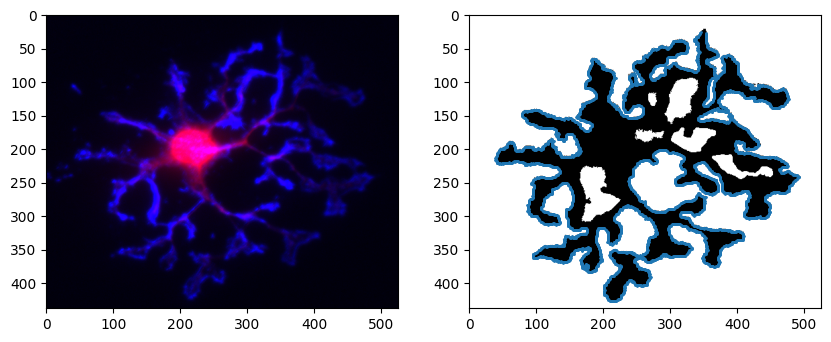

In [ ]:
crop_list_path = '/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/crop_list.csv'
crop_list = pd.read_csv(crop_list_path,sep=";")

for i in range(len(crop_list)):
    #print(np.dtype(crop_list['include'][i]))
    if not crop_list['include'][i] :
        filename = crop_list['Name'][i]
        print('filename:',filename)
        img_path = os.path.join('/Users/tom/Downloads/add_data', 'imgs', filename)
        mask_path = os.path.join('/Users/tom/Downloads/add_data', 'masks', filename[:-4]+'.tif')
        annot_path = os.path.join('/Users/tom/Downloads/add_data', 'jsons', filename[:-4]+'_mask.json')
        x1, y1, x2, y2 = int(crop_list['x1'][i]), int(crop_list['y1'][i]), int(crop_list['x2'][i]), int(crop_list['y2'][i])

        print('bbox:',x1, y1, x2, y2)

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path)
        annot = json.load(open(annot_path))

        fig,ax = plt.subplots(1,2,figsize=(10,10))
        ax[0].imshow(img)
        ax[0].plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],'r')
        ax[1].imshow(mask)
        for i in range(len(annot['shapes'])):
            x = [annot['shapes'][i]['points'][j][0] for j in range(len(annot['shapes'][i]['points']))]
            y = [annot['shapes'][i]['points'][j][1] for j in range(len(annot['shapes'][i]['points']))]
            ax[1].scatter(x,y,label=annot['shapes'][i]['cell number'],s=0.5)
        plt.show()

        crop_img = img[y1:y2,x1:x2]
        crop_mask = mask[y1:y2,x1:x2]
        new_annot = {'shapes':[],
                        'imagePath':os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data_crop/train', 'imgs', filename),
                        'imageHeight':y2-y1,'imageWidth':x2-x1}
        for j in range(len(annot['shapes'])):
            object_dict = {'points':[],
                        'label':annot['shapes'][j]['label'],
                        'cell number':annot['shapes'][j]['cell number']}
            new_points = []
            out_range = False
            for k in range(len(annot['shapes'][j]['points'])):
                new_x, new_y = annot['shapes'][j]['points'][k][0]-x1, annot['shapes'][j]['points'][k][1]-y1
                if new_x < 0 or new_y < 0 or new_x > x2-x1 or new_y > y2-y1:
                    out_range = True
                    break
                new_points.append([new_x, new_y])
            if out_range:
                continue
            object_dict['points'] = new_points
            new_annot['shapes'].append(object_dict)
            break

        fig,ax = plt.subplots(1,2,figsize=(10,10))
        ax[0].imshow(crop_img)
        ax[1].imshow(crop_mask)
        for i in range(len(new_annot['shapes'])):
            x = [new_annot['shapes'][i]['points'][j][0] for j in range(len(new_annot['shapes'][i]['points']))]
            y = [new_annot['shapes'][i]['points'][j][1] for j in range(len(new_annot['shapes'][i]['points']))]
            ax[1].scatter(x,y,label=str(new_annot['shapes'][i]['cell number'])+'_'+new_annot['shapes'][i]['label'],s=1)
        plt.show()

## Prepare cropped dataset

In [ ]:
crop_list_path = '/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/crop_list.csv'
crop_list = pd.read_csv(crop_list_path,sep=";")

for i in range(len(crop_list)):
    if (crop_list['y2'][i]-crop_list['y1'][i])%2 != 0:
        crop_list['y2'][i] += 1
    if (crop_list['x2'][i]-crop_list['x1'][i])%2 != 0:
        crop_list['x2'][i] += 1

idx_list = list(np.arange(0, len(crop_list)))
idx_list_train = random.sample(idx_list, int(len(crop_list)*0.6))
remain_idx = list(set(idx_list) - set(idx_list_train))
idx_list_valid = random.sample(remain_idx, int(len(remain_idx)*0.5))
idx_list_test = list(set(remain_idx) - set(idx_list_valid))
print(crop_list.head())

for i in range(len(crop_list)):
    if crop_list['include'][i] == False:
        continue
    filename = crop_list['Name'][i]
    subset = 'train' if i in idx_list_train else 'valid' if i in idx_list_valid else 'test'

    x1, y1, x2, y2 = int(crop_list['x1'][i]), int(crop_list['y1'][i]), int(crop_list['x2'][i]), int(crop_list['y2'][i])
    new_filename = filename[:-4]+f'_{x1},{y1}_{x2},{y2}.tif'

    img_path = os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data', 'imgs', filename)
    mask_path = os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data', 'masks', filename[:-4]+'.tif')
    crop_img = cv2.imread(img_path)[y1:y2, x1:x2]
    print(filename,crop_img.shape)
    crop_mask = cv2.imread(mask_path)[y1:y2, x1:x2]
    cv2.imwrite(os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data_crop', subset, 'imgs', new_filename), crop_img)
    cv2.imwrite(os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data_crop', subset, 'masks',new_filename), crop_mask)

    annotations = json.load(open(os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data', 'json', filename[:-4]+'_mask.json')))
    new_annotations = {'shapes':[],
                       'imagePath':os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data_crop', subset, 'imgs', new_filename),
                       'imageHeight':y2-y1,'imageWidth':x2-x1}
    for j in range(len(annotations['shapes'])):
        object_dict = {'points':[],
                       'label':annotations['shapes'][j]['label'],
                       'cell number':annotations['shapes'][j]['cell number']}
        new_points = []
        flag = False
        for k in range(len(annotations['shapes'][j]['points'])):
            new_x, new_y = annotations['shapes'][j]['points'][k][0]-x1, annotations['shapes'][j]['points'][k][1]-y1
            if new_x < 0 or new_y < 0 or new_x > x2-x1 or new_y > y2-y1:
                flag = True
                break
            new_points.append([new_x, new_y])
        if flag:
            continue
        object_dict['points'] = new_points
        new_annotations['shapes'].append(object_dict)
    with open(os.path.join('/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data_crop', subset, 'jsons', new_filename[:-4]+'_mask.json'), 'w') as outfile:
        json.dump(new_annotations, outfile)

                     Name    x1   y1    x2    y2  include
0  281.it10.20x.r1.10.tif   850  750  1860  1650     True
1  281.it10.20x.r1.11.tif     0  250   900  1050     True
2  281.it10.20x.r1.11.tif  1269  309  2259  1029     True
3  281.it10.20x.r1.11.tif   957  894  1855  1636     True
4   281.it10.20x.r1.4.tif   950  700  1850  1500     True
281.it10.20x.r1.10.tif (900, 1010, 3)
281.it10.20x.r1.11.tif (800, 900, 3)
281.it10.20x.r1.11.tif (720, 990, 3)
281.it10.20x.r1.11.tif (742, 898, 3)
281.it10.20x.r1.4.tif (800, 900, 3)
281.it10.20x.r1.7.tif (950, 950, 3)
281.it10.20x.r1.7.tif (800, 650, 3)
281.it10.20x.r1.8.tif (798, 868, 3)
281.it10.20x.r1.8.tif (798, 792, 3)
281.it10.20x.r2.2.tif (850, 900, 3)
281.it10.20x.r2.3.tif (900, 900, 3)
281.it10.20x.r2.4.tif (800, 950, 3)
281.it10.20x.r2.5.tif (800, 800, 3)
281.it10.20x.r2.5.tif (800, 750, 3)
281.it10.20x.r2.6.tif (900, 1000, 3)
281.it10.20x.r2.7.tif (1000, 1000, 3)
281.it10.20x.r3.1.tif (622, 918, 3)
281.it10.20x.r3.1.tif (790, 888,

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os
data_folder_path = '/Users/tom/Desktop/Stanford/RA/OligodendroSight/OL_mrcnn/data'
img_folder_path = os.path.join(data_folder_path, 'imgs')
mask_folder_path = os.path.join(data_folder_path, 'masks')
json_folder_path = os.path.join(data_folder_path, 'jsons')

train_path = os.path.join(data_folder_path, 'train')
valid_path = os.path.join(data_folder_path, 'valid')
test_path = os.path.join(data_folder_path, 'test')

img_train, img_else = train_test_split(os.listdir(img_folder_path), test_size=0.4, random_state=42)
img_valid, img_test = train_test_split(img_else, test_size=0.5, random_state=42)

for img_name in img_train:
    if img_name[-4:] != '.tif':
        continue
    json_name = img_name[:-4]+'_mask.json'
    img_path = os.path.join(img_folder_path, img_name)
    mask_path = os.path.join(mask_folder_path, img_name)
    annot_path = os.path.join(json_folder_path, json_name)

    shutil.move(img_path, os.path.join(train_path, 'imgs', img_name))
    shutil.move(mask_path, os.path.join(train_path, 'masks', img_name))
    shutil.move(annot_path, os.path.join(train_path, 'jsons', json_name))   

for img_name in img_valid:
    if img_name[-4:] != '.tif':
        continue
    json_name = img_name[:-4]+'_mask.json'
    img_path = os.path.join(img_folder_path, img_name)
    mask_path = os.path.join(mask_folder_path, img_name)
    annot_path = os.path.join(json_folder_path, json_name)

    shutil.move(img_path, os.path.join(valid_path, 'imgs', img_name))
    shutil.move(mask_path, os.path.join(valid_path, 'masks', img_name))
    shutil.move(annot_path, os.path.join(valid_path, 'jsons', json_name))

for img_name in img_test:
    if img_name[-4:] != '.tif':
        continue
    json_name = img_name[:-4]+'_mask.json'
    img_path = os.path.join(img_folder_path, img_name)
    mask_path = os.path.join(mask_folder_path, img_name)
    annot_path = os.path.join(json_folder_path, json_name)

    shutil.move(img_path, os.path.join(test_path, 'imgs', img_name))
    shutil.move(mask_path, os.path.join(test_path, 'masks', img_name))
    shutil.move(annot_path, os.path.join(test_path, 'jsons', json_name))


In [ ]:
import tifffile as tiff
path =  '/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data/train/masks'
for filename in os.listdir(path):
    if filename.endswith('.tif'):
        print(filename, img.shape)
        img = tiff.imread(os.path.join(path, filename))


281.it11.20x.r1.8.tif (2208, 2752, 3)


TiffFileError: not a TIFF file b'\x89PNG'

In [ ]:
path =  '/Users/tom/Desktop/Stanford/RA/OligodendroSight/mrcnn/data/test/imgs/281.it10.20x.r2.1.tif'
img = cv2.imread(path)
tiff.imwrite(path, img)


In [ ]:
from PIL import Image,ImageOps
import math
import os 

Image.MAX_IMAGE_PIXELS = None

def crop_image_to_squares(image_path, n):
    # Load the image
    img = Image.open(image_path)
    
    # Determine the size of the image
    width, height = img.size
    
    # Check if the image is square
    if width != height:
        raise ValueError("Image must be square")
    
    # Calculate the size of each small square
    size_of_square = width // n
    
    # Initialize a list to hold the cropped images
    cropped_images = []
    
    # Crop the image into n^2 small square images
    for i in range(n):
        for j in range(n):
            # Calculate the coordinates of the top-left corner of the square
            left = j * size_of_square
            top = i * size_of_square
            right = left + size_of_square
            bottom = top + size_of_square
            
            # Crop the image
            cropped_img = img.crop((left, top, right, bottom))
            cropped_images.append(cropped_img)
    
    return cropped_images

# Example usage
image_path = '/Users/tom/Downloads/370_B8_8kx_ROI-2_assembled montage.tif'  # Specify the path to your image
dir_path = '/Users/tom/Downloads/test_match_histo'
n = 10  # Specify the number of divisions per side
cropped_images = crop_image_to_squares(image_path, n)

# Optionally, save the cropped images
for index, cropped_img in enumerate(cropped_images):
    cropped_img.save(os.path.join(dir_path,f'cropped_{index}.tif'))

In [ ]:
import re

def load_sorted_images(folder_path, file_pattern):
    """Load images sorted by numerical order extracted from filenames matching a pattern."""
    # Compile a regular expression to extract numbers from filenames
    num_extract_re = re.compile(file_pattern)
    
    # List files and sort by the numerical part of the filename
    files = sorted(
        (f for f in os.listdir(folder_path) if num_extract_re.match(f)),
        key=lambda x: int(num_extract_re.match(x).groups()[0])
    )
    
    # Load images
    images = []
    for filename in files:
        img_path = os.path.join(folder_path, filename)
        try:
            with Image.open(img_path) as img:
                images.append(img.copy())
        except IOError:
            print(f"Could not open {filename}. Skipping.")
    return images

def stitch_images(images, rows, cols):
    """Stitch images into one large image assuming a grid of rows x cols."""
    if not images:
        return None

    # Assume all images are the same size
    img_width, img_height = images[0].size

    # Create a new image to stitch into
    stitched_image = Image.new('L', (img_width * cols, img_height * rows))

    # Paste each image into the new image
    for index, image in enumerate(images):
        x = index % cols
        y = index // cols
        stitched_image.paste(image, (x * img_width, y * img_height))
    
    return stitched_image

# Example usage
folder_path = '/Users/tom/Downloads/test_match_histo_PNGs'  # Specify the folder containing the images
file_pattern = r'cropped_(\d+)\.tif'  # Regex pattern to match and order files

images = load_sorted_images(folder_path, file_pattern)

# Specify the grid dimensions if known or calculated
rows = 10  # Number of rows
cols = 10  # Number of columns

if len(images) != rows * cols:
    print("The number of images does not match the expected grid dimensions.")
else:
    stitched_image = stitch_images(images, rows, cols)
    stitched_image.save(os.path.join(folder_path,'stitched_image.tif'))  # Save the stitched image

: 

## Testing for normalizing images

(3, 2208, 2752, 1)
uint16
(2208, 2752, 3)
uint8
62


/Users/tom/miniconda3/envs/tf_env/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


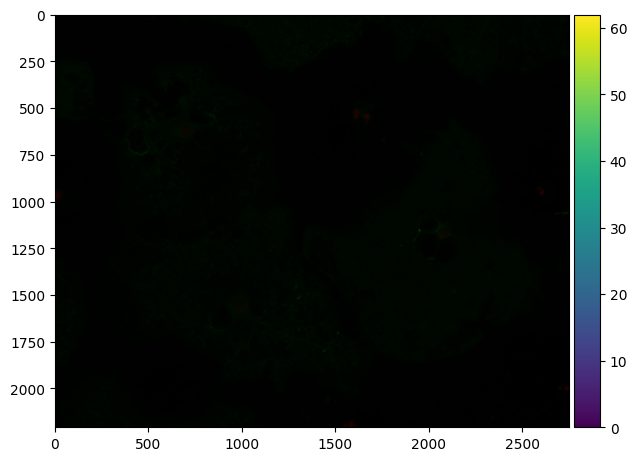

In [ ]:
import czifile
import numpy as np
import skimage
czi_path = '/Users/tom/Downloads/BZ_OL_images/BZ-MBL_002_20x_DMSO-left-02_photogenic.czi'
czi = czifile.CziFile(czi_path)
image = czi.asarray()
print(image.shape)
print(image.dtype)
image = image.transpose(1,2,0,3).squeeze()
image= skimage.exposure.rescale_intensity(image, in_range='dtype', out_range='uint8')
print(image.shape)
print(image.dtype)
print(np.max(image))
skimage.io.imshow(image)

In [ ]:
import skimage
import os
import matplotlib.pyplot as plt
import numpy as np
dir_path = "/Users/tom/Desktop/Stanford/RA/OligodendroSight/OL_mrcnn/data/train/imgs"
dir_path_norm = "/Users/tom/Desktop/Stanford/RA/OligodendroSight/OL_mrcnn/data/train/imgsnorm"
for filename in os.listdir(dir_path):
    if filename.endswith('.tif'):
        img = skimage.io.imread(os.path.join(dir_path, filename))
        img_norm = skimage.io.imread(os.path.join(dir_path_norm, filename),as_gray=True)
        print(img.shape)
        print(img.dtype)
        print(np.max(img))
        print(img_norm.shape)
        print(img_norm.dtype)
        print(np.max(img_norm))
        break
        img_norm2 = skimage.io.imread(os.path.join(dir_path, filename),as_gray=True)
        img_norm2 = skimage.exposure.equalize_adapthist(img_norm2, clip_limit=0.02)
        fig, ax = plt.subplots(1,1,figsize=(10,15))
        #ax[0].imshow(img)
        #ax[1].imshow(img_norm)
        ax.imshow(img_norm2)
        plt.show()

(2208, 2752, 3)
uint8
255
(2208, 2752)
float64
1.0


281.it11.20x.r1.8.tif
(2208, 2752, 3)
255


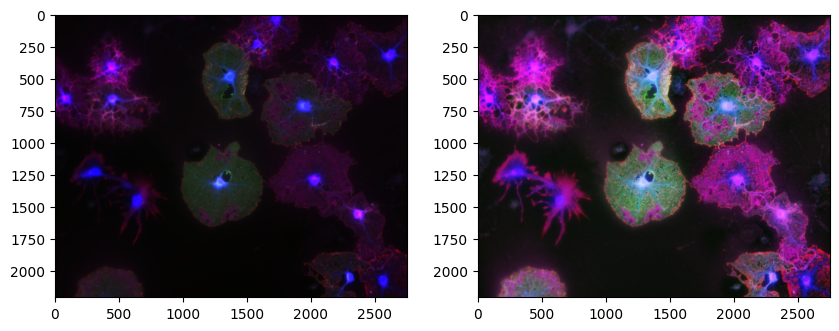

281.it12.20x.r1.1.tif
(2208, 2752, 3)
255


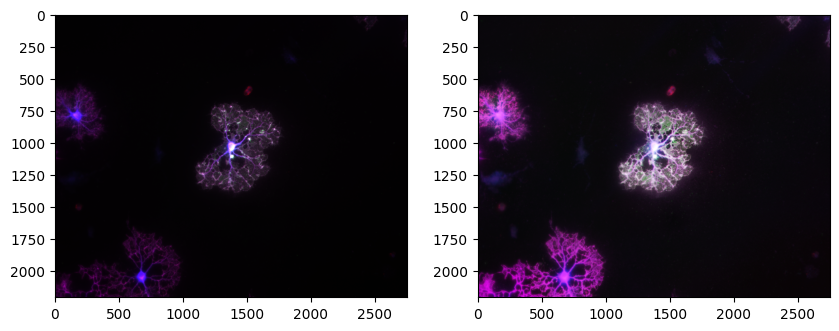

image_06.tif
(2208, 2752, 3)
0


In [ ]:
import skimage
import os
import matplotlib.pyplot as plt
import numpy as np
dir_path = "/Users/tom/Desktop/Stanford/RA/OligodendroSight/OL_mrcnn/data/train/imgs"
dir_path_norm = "/Users/tom/Desktop/Stanford/RA/OligodendroSight/OL_mrcnn/data/train/imgsnorm"
for filename in os.listdir(dir_path):
    if filename.endswith('.tif'):
        img = skimage.io.imread(os.path.join(dir_path, filename))
        print(filename)
        print(img.shape)
        print(np.max(img[:,:,2]))
        if filename == 'image_06.tif':
            
            break
        r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
        if np.max(r) == 0:
            r_eq = r
        else:
            r_eq = skimage.exposure.equalize_adapthist(r, clip_limit=0.02)
        if np.max(g) == 0:
            g_eq = g
        else:
            g_eq = skimage.exposure.equalize_adapthist(g, clip_limit=0.02)
        if np.max(b) == 0:
            b_eq = b
        else:
            b_eq = skimage.exposure.equalize_adapthist(b, clip_limit=0.02)
        img_norm = np.stack((r_eq,g_eq,b_eq),axis=-1)

        fig, ax = plt.subplots(1,2,figsize=(10,10))
        ax[0].imshow(img)
        ax[1].imshow(img_norm)
        plt.show()

In [4]:
import skimage
import os
import numpy as np

for filename in os.listdir('/Users/tom/Downloads/ed_ometifs'):
    if filename.endswith('.tif'):
        img = skimage.io.imread(os.path.join('/Users/tom/Downloads/ed_ometifs', filename))
        print(img.shape)
        break
        #skimage.io.imsave(os.path.join('/Users/tom/Downloads/ed_ometifs_0', filename[:-8]+'.tif'),img[0])

(13, 2208, 2752)


## Img vs mask

CE031_I1_div3_1hrinterval_concatenated_tx_aftertp1_timealigned_scP101-B3.tif


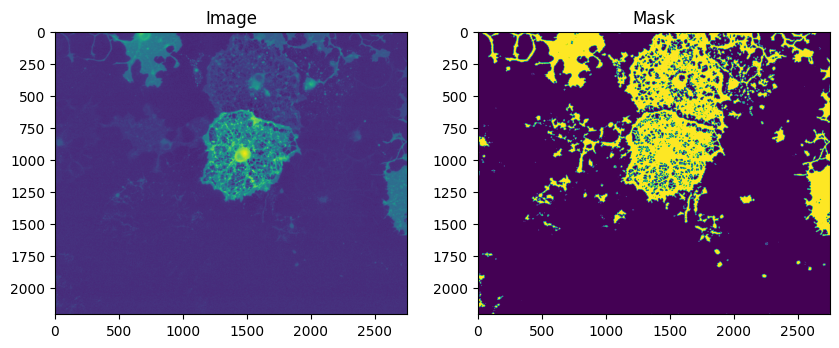

KeyboardInterrupt: Interrupted by user

In [8]:
import skimage
import os 
import numpy as np
import matplotlib.pyplot as plt

listfiles = sorted(os.listdir('/Users/tom/Downloads/ed_ometifs_0'))
for filename in listfiles:
    if filename.endswith('.tif'):
        img = skimage.io.imread(os.path.join('/Users/tom/Downloads/ed_ometifs_0', filename))
        enhanced_img = skimage.exposure.equalize_adapthist(img, clip_limit=0.02)
        masks = skimage.io.imread(os.path.join('/Users/tom/Downloads/raw_ometifs_chsubset0_caaxch_seg', filename[:-4]+'_seg.tif'))
        mask = masks[0]
        print(filename)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Plot the img
        axes[0].imshow(enhanced_img)
        axes[0].set_title('Image')

        # Plot the mask
        axes[1].imshow(mask)
        axes[1].set_title('Mask')

        plt.show()
        input()
        

In [19]:
import pandas as pd
csv_path = '/Users/tom/Downloads/plugintest/results.csv'
results = pd.read_csv(csv_path)
print(results.head())
image_names = results['image_name'].unique()
print(image_names)
for image_name in image_names:
    str_rois = results[results['image_name'] == image_name]['detection_id'].values
    #rois = [[int(coord) for coord in str_roi.strip('[]').split()] for str_roi in str_rois]
    print(str_rois)
    
    break

              image_name  detection_id  class  score                  bbox
0  281.it10.20x.r2.1.tif             0  class   0.99   [581 803 1852 1651]
1  281.it10.20x.r2.1.tif             1  class   0.99        [83 0 858 642]
2  281.it10.20x.r2.1.tif             2  class   0.99   [306 1058 879 1781]
3  281.it10.20x.r1.9.tif             0  class   0.99  [545 1755 1135 2390]
4  281.it10.20x.r1.9.tif             1  class   0.99  [804 1078 1433 1677]
['281.it10.20x.r2.1.tif' '281.it10.20x.r1.9.tif']
[0 1 2]
